In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(2019)

In [82]:
import os
real = os.listdir('PPGMaps/Real/')
fake = os.listdir('PPGMaps/Fake/')
import numpy as np
train_real = np.random.choice(real,size=700,replace=False)
train_fake = np.random.choice(fake,size=700,replace=False)
import shutil
for i in train_real:
    shutil.copy(f'PPGMaps/Real/{i}',f'ImgClass/Train/Real/{i}')
for i in train_fake:
    shutil.copy(f'PPGMaps/Fake/{i}',f'ImgClass/Train/Fake/{i}')
for i in np.setdiff1d(real,train_real):
    shutil.copy(f'PPGMaps/Real/{i}',f'ImgClass/Test/Real/{i}')
for i in np.setdiff1d(fake,train_fake):
    shutil.copy(f'PPGMaps/Fake/{i}',f'ImgClass/Test/Fake/{i}')

In [83]:
bs=30         #Setting batch size
train_dir = "ImgClass/Train/"   #Setting training directory
validation_dir = "ImgClass/Test/"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [84]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [85]:
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(128,32))
validation_generator =  test_datagen.flow_from_directory(validation_dir,batch_size=bs,class_mode  = 'categorical',target_size=(128,32))

Found 1400 images belonging to 2 classes.
Found 595 images belonging to 2 classes.


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,1)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])


In [68]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [92]:
# Importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

# Creating a Sequential model
model = Sequential()

# Adding Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 32, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flattening the 3D tensor to 1D vector
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Adding Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 neurons for binary classification with softmax activation
adam=Adam(learning_rate=0.001)
# Compiling the model
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 128, 32, 32)       896       
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 64, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 64, 16, 64)        18496     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 32, 8, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 32, 8, 128)        73856     
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 16, 4, 128)      

In [87]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=2)

Epoch 1/100
47/47 - 29s - loss: 0.6958 - accuracy: 0.4771 - val_loss: 0.6931 - val_accuracy: 0.4958 - 29s/epoch - 625ms/step
Epoch 2/100
47/47 - 24s - loss: 0.6906 - accuracy: 0.5379 - val_loss: 0.7028 - val_accuracy: 0.4958 - 24s/epoch - 500ms/step
Epoch 3/100
47/47 - 20s - loss: 0.6956 - accuracy: 0.5043 - val_loss: 0.6931 - val_accuracy: 0.5042 - 20s/epoch - 419ms/step
Epoch 4/100
47/47 - 20s - loss: 0.6935 - accuracy: 0.4979 - val_loss: 0.6930 - val_accuracy: 0.6134 - 20s/epoch - 420ms/step
Epoch 5/100
47/47 - 20s - loss: 0.6916 - accuracy: 0.5307 - val_loss: 0.6926 - val_accuracy: 0.5429 - 20s/epoch - 422ms/step
Epoch 6/100
47/47 - 20s - loss: 0.6936 - accuracy: 0.5221 - val_loss: 0.6949 - val_accuracy: 0.4958 - 20s/epoch - 421ms/step
Epoch 7/100
47/47 - 20s - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4958 - 20s/epoch - 421ms/step
Epoch 8/100
47/47 - 20s - loss: 0.6934 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.4958 - 20s/epoch - 421ms/step


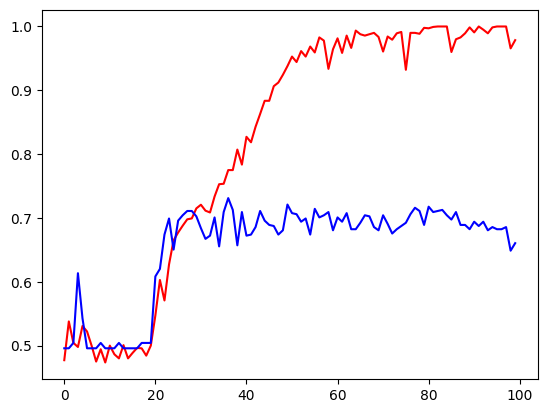

In [88]:
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.show()

In [90]:
max(history.history['val_accuracy'])

0.7310924530029297

In [91]:
model.save("ppgmodel.h5")

c:\Users\sivaram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [93]:
k = load_model('ppgmodel.h5')

In [102]:
k.evaluate(validation_generator)

20/20 [==============================] - 1s 53ms/step - loss: 2.0256 - accuracy: 0.6605


[2.0255846977233887, 0.6605042219161987]